In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
%matplotlib inline

In [43]:
df = pd.read_csv('data.csv')

In [44]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
df.isnull().sum() #there is no null values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [47]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [48]:
df.duplicated().sum() #there is no duplicate data

np.int64(0)

In [49]:
df_columns = df.select_dtypes(include=["number"]).columns
for col in df_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,2.330000e+02,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,...,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,2.325291e+06,12.620519,17.695966,80.977682,498.173820,0.090749,0.072419,0.038148,0.024966,0.170112,...,13.980562,23.719399,90.617253,609.382833,0.124388,0.171502,0.154711,0.077067,0.271813,0.076741
std,3.183577e+06,1.639139,3.774172,10.915792,128.401493,0.011276,0.025045,0.024049,0.014340,0.019242,...,1.912339,5.386880,12.931210,165.505300,0.017670,0.070416,0.093648,0.033356,0.037257,0.009469
min,8.913000e+03,8.618000,9.710000,54.340000,224.500000,0.062510,0.019380,0.000000,0.000000,0.121500,...,9.262000,12.020000,58.360000,259.200000,0.081250,0.034320,0.000000,0.000000,0.178300,0.058430
25%,8.660830e+05,11.490000,14.960000,73.730000,404.900000,0.083110,0.053010,0.020870,0.015020,0.157300,...,12.830000,19.740000,82.760000,503.000000,0.111500,0.123100,0.084230,0.056140,0.244400,0.069560
50%,9.018360e+05,12.750000,17.270000,81.350000,493.800000,0.089830,0.069340,0.035120,0.023220,0.168300,...,13.860000,23.070000,88.840000,589.500000,0.123400,0.167600,0.145300,0.076320,0.268500,0.076230
75%,9.184650e+05,13.690000,19.460000,88.120000,579.100000,0.098310,0.086060,0.052630,0.031100,0.184400,...,15.140000,27.210000,99.310000,708.800000,0.136900,0.215600,0.210200,0.098510,0.299100,0.082510
max,9.113778e+06,16.840000,29.430000,108.400000,880.200000,0.123700,0.166100,0.119100,0.074830,0.223800,...,18.220000,37.880000,120.300000,1032.000000,0.173300,0.372400,0.434100,0.156500,0.373900,0.102700


In [50]:
categorical_cols=df.select_dtypes(include=['object']).columns

label_encoders={}
for col in categorical_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders=le
df[categorical_cols].head()

,diagnosis
19,0
20,0
21,0
37,0
40,1


In [51]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [52]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


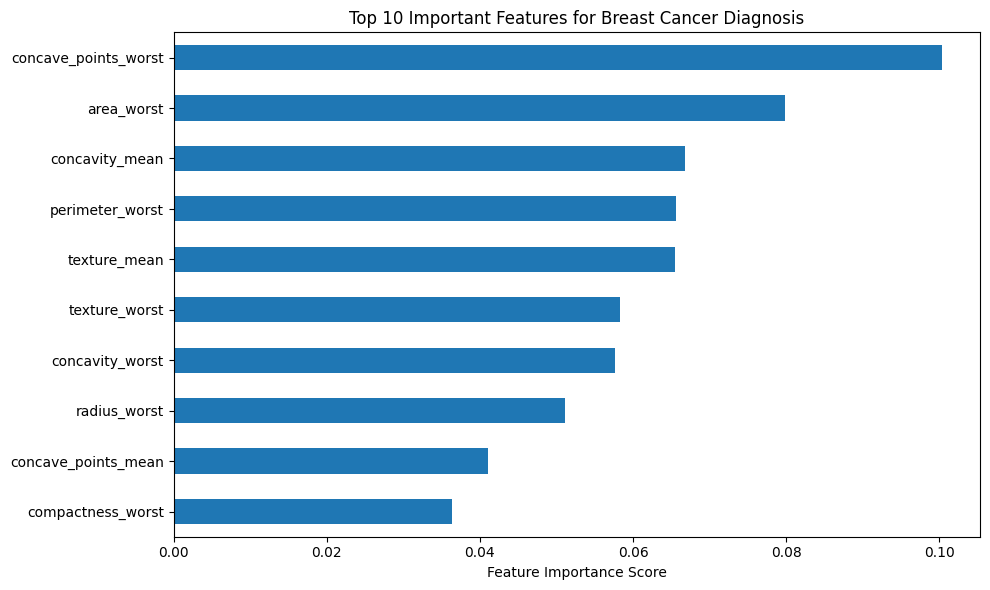

In [53]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = importances.head(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 10 Important Features for Breast Cancer Diagnosis")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [54]:
importances.head(10)

concave_points_worst    0.100291
area_worst              0.079861
concavity_mean          0.066775
perimeter_worst         0.065567
texture_mean            0.065475
texture_worst           0.058266
concavity_worst         0.057628
radius_worst            0.051063
concave_points_mean     0.041104
compactness_worst       0.036333
dtype: float64

In [55]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,2.330000e+02,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,...,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,2.325291e+06,0.060086,12.620519,17.695966,80.977682,498.173820,0.090749,0.072419,0.038148,0.024966,...,13.980562,23.719399,90.617253,609.382833,0.124388,0.171502,0.154711,0.077067,0.271813,0.076741
std,3.183577e+06,0.238157,1.639139,3.774172,10.915792,128.401493,0.011276,0.025045,0.024049,0.014340,...,1.912339,5.386880,12.931210,165.505300,0.017670,0.070416,0.093648,0.033356,0.037257,0.009469
min,8.913000e+03,0.000000,8.618000,9.710000,54.340000,224.500000,0.062510,0.019380,0.000000,0.000000,...,9.262000,12.020000,58.360000,259.200000,0.081250,0.034320,0.000000,0.000000,0.178300,0.058430
25%,8.660830e+05,0.000000,11.490000,14.960000,73.730000,404.900000,0.083110,0.053010,0.020870,0.015020,...,12.830000,19.740000,82.760000,503.000000,0.111500,0.123100,0.084230,0.056140,0.244400,0.069560
50%,9.018360e+05,0.000000,12.750000,17.270000,81.350000,493.800000,0.089830,0.069340,0.035120,0.023220,...,13.860000,23.070000,88.840000,589.500000,0.123400,0.167600,0.145300,0.076320,0.268500,0.076230
75%,9.184650e+05,0.000000,13.690000,19.460000,88.120000,579.100000,0.098310,0.086060,0.052630,0.031100,...,15.140000,27.210000,99.310000,708.800000,0.136900,0.215600,0.210200,0.098510,0.299100,0.082510
max,9.113778e+06,1.000000,16.840000,29.430000,108.400000,880.200000,0.123700,0.166100,0.119100,0.074830,...,18.220000,37.880000,120.300000,1032.000000,0.173300,0.372400,0.434100,0.156500,0.373900,0.102700


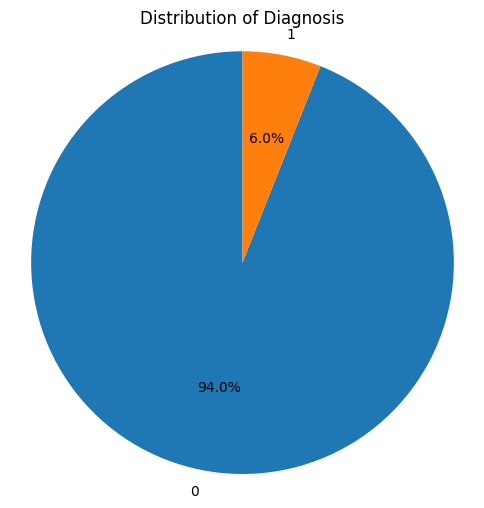

In [56]:
diagnosis_counts = df['diagnosis'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diagnosis')
plt.axis('equal')
plt.show()

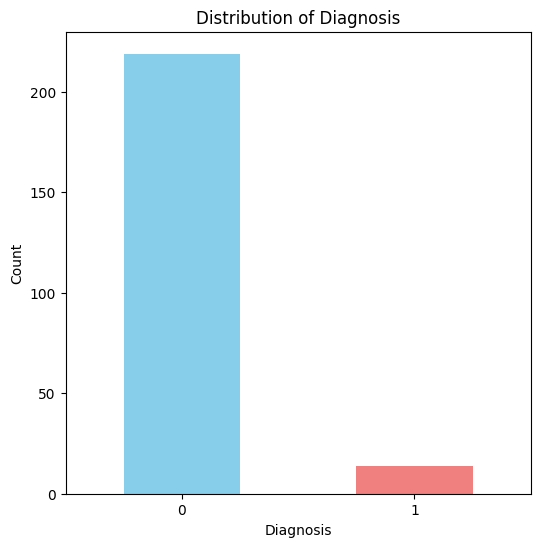

In [57]:
plt.figure(figsize=(6, 6))
diagnosis_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

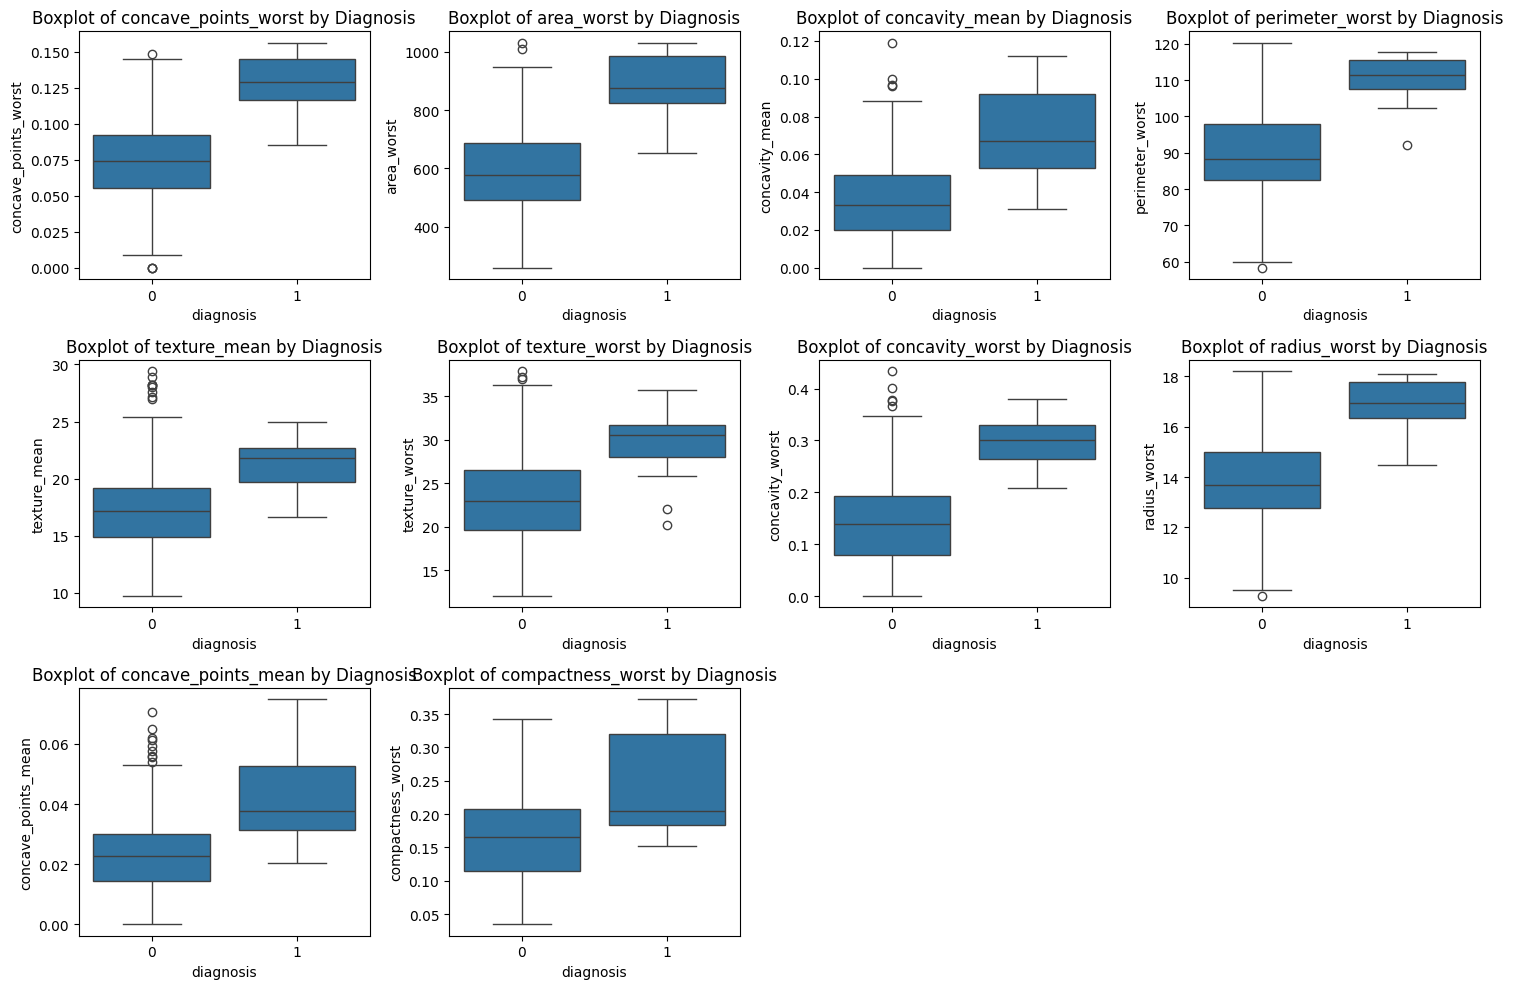

In [58]:
top_features_list = top_features.index.tolist()
cols_to_plot = top_features_list + ['diagnosis']

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_features_list):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(f'Boxplot of {col} by Diagnosis')
plt.tight_layout()
plt.show()

In [59]:
X_reg=df[['concave_points_worst']]
y_reg=df['diagnosis'].astype('int')
X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(X_reg,y_reg,test_size=0.4,random_state=42)

In [60]:
reg = LogisticRegression()
reg.fit(X_train_reg, y_train_reg)
prob = reg.predict_proba(X_test_reg)[:, 1]
X_plot = np.linspace(X_reg['concave_points_worst'].min(), X_reg['concave_points_worst'].max(), 100).reshape(-1, 1)
prob_curve = reg.predict_proba(X_plot)[:, 1]

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
y_pred = reg.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred)
print(f'MSE Decision Tree: {mse_reg:.2f}')

MSE Decision Tree: 0.09


In [62]:
y_pred = reg.predict(X_test_reg)
cm = confusion_matrix(y_test_reg, y_pred)
accuracy = accuracy_score(y_test_reg, y_pred)
precision = precision_score(y_test_reg, y_pred)
recall = recall_score(y_test_reg, y_pred)
f1 = f1_score(y_test_reg, y_pred)

print('Confusion Matrix:\n', cm)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Confusion Matrix:
 [[86  0]
 [ 8  0]]
Accuracy: 0.91
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [63]:
X_reg=df[['concave_points_worst']]
y_reg=df['diagnosis'].astype('int')
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [64]:
y_test_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
print(f'MSE Decision Tree: {mse_dt:.2f}')

MSE Decision Tree: 0.04
